# <span style="color:blue">Esercitazione 10</span>

### Esercizio 10.1

Risolvo qui lo stesso TSP della <font face="Courier">lezione09</font> tramite *Simulated Annealing* (SA).

Per farlo ho scritto la libreria <font face="Courier">SimAnnTSP</font>, che in sostanza sfrutta gli operatori di mutazione implementati in <font face="Courier">TSPpath</font> per definire la probabilità di transizione di prova dell'algoritmo di Metropolis che permette il campionamento del peso di Boltzmann (qui come energia si prende la lunghezza del cammino) durante il processo di annealing (per una spiegazione più dettagliata del processo SA si veda l'<font face="Courier">esercizio8.2</font>).\
In pratica a ogni step MC provo la modifica del cammino usando in sequenza tutti gli operatori di mutazione, verificando l'accettazione della mossa dopo l'utilizzo di ognuno di essi.

Per l'annealing schedule non ho più abbassato la temperatura $T$ crescendo linearmente in $\beta$ (come nella <font face="Courier">lezione08</font>), ma ho invece suddiviso il range di temperature esplorate in $5$ "fasi" diverse, in ognuna delle quali è $T$ a decrescere linearmente. Le fasi sono caratterizzate da un numero crescente sia di temperature esplorate sia di step MC eseguiti per ognuna di esse, in modo che l'accettazione media $\langle A \rangle$ delle mosse di modifica del percorso diminuisca in maniera graduale (seguo qui l'idea che un lento raffreddamento debba essere rappresentato da una lenta decrescita di $\langle A \rangle$ e che un'improvvisa discesa sia pericolosa, in quanto può rappresentare la stabilizzazione a bassa $T$ su un minimo locale).

La temperatura massima è stata fissata a $T_{max}=30$, quella minima a $T_{min}=0.01$. La prima permette di esplorare lo spazio delle soluzioni in maniera estremamente efficiente, con $\langle A \rangle \simeq 99\%$, mentre $T_{min}$ non è stata abbassata ulteriormente perché a $T$ inferiori $\langle A \rangle$ smette di diminuire per diventare oscillante, e ho quindi ritenuto raggiunto il limite della risoluzione ottenibile con l'annealing schedule tabulata (si veda il codice, <font face="Courier">main01.C</font>, per i dettagli); in altre parole ho ritenuto raggiunta per questo sistema con buona approssimazione una temperatura nulla. D'altra parte non ho ritenuto necessario intensificare maggiormente la tabella delle temperature o i tempi di permanenza in ognuna di esse, in quanto, come si vede più sotto, i risultati sono già del tutto soddisfacenti.

Al termine della fase di raffreddamento il programma esegue una fase finale di campionamento alla temperatura minima. La simulazione si interrompe solo se non si osservano ulteriori miglioramenti del risultato per $N_{max}=10^4$ iterazioni consecutive.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
loc=('square','circ'); ncit=('32','100')
dist=[0,0]; path=[0,0]   #1st is square, 2nd circ
prog=[0,0]               #progressive total length evolution

theta=np.linspace(0,2.*3.141593,num=200)    #for circ graphs
sinn=np.sin(theta); coss=np.cos(theta)
title=('Square','Circumference')

In [3]:
def path_fig(ifstart, icore):
    pl.figure(figsize=(9,4))
    for i in range(2):
        pl.subplot(1,2,i+1)
        if i==1: pl.plot(coss,sinn,color='k',linewidth=0.4)
        pl.plot(path[i]['x'],path[i]['y'],marker='*',linewidth=1)
        pl.plot(path[i]['x'][0],path[i]['y'][0],marker='*',color='r')
        pl.xlabel('$x$')
        if i==0: pl.ylabel('$y$',labelpad=15)
        pl.xlim(-1.05,1.05)
        pl.ylim(-1.05,1.05)
        pl.title(title[i])
    if ifstart: tit="Starting"
    else: tit="Final"
    if icore>=0: cont_tit = ", "+str(icore+1)+"-th continent"
    else: cont_tit=""
    pl.suptitle(tit+" 1-st chromosome's path"+cont_tit,y=1.02)
    pl.show()
    
    print(tit+' total distance:')
    for i in range(2): print('  '+loc[i]+': \t', dist[i])

Qui sotto la situazione di partenza. La generazione delle posizioni delle città e del cammino iniziale viene fatta come nella <font face="Courier">lezione09</font>.

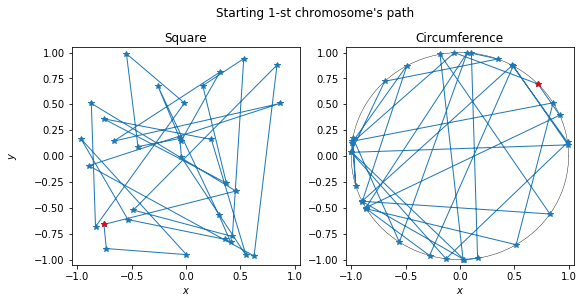

Starting total distance:
  square: 	 33.7649
  circ: 	 40.8131


In [4]:
for i in range(2):
    dist[i]=np.genfromtxt('results/cities.'+loc[i]+'.32.SA.start',max_rows=1)
    path[i]=np.genfromtxt('results/cities.'+loc[i]+'.32.SA.start',skip_header=1,names='x,y')

path_fig(True,-1)

In [5]:
best=[0,0]; index=[0,0]
def SA_fig(xlim,ylim):
    for i in range(2):
        fig,ax=pl.subplots(figsize=(12,5))
        pl.plot(prog[i]['gen'],prog[i]['best'],marker='.',markersize=0.2,linestyle='')
        best[i]=min(prog[i]['best']); index[i]=np.argmin(prog[i]['best'])
        pl.axhline(y=best[i],color='k',linestyle='dashed',linewidth=0.8)
        pl.grid(True)
        pl.xlabel('$N_{stp}$')
        pl.ylabel("best path's lenght",labelpad=15)
        pl.title("Path's lenght evolution ("+loc[i]+" case)")

        axins=inset_axes(ax,5.6,2.8,loc=1)
        axins.plot(prog[i]['gen'],prog[i]['best'],marker='.',markersize=2,linestyle='')
        axins.axhline(y=best[i],color='k',linestyle='dashed',linewidth=0.8)
        axins.set_xlim(xlim[i])
        axins.set_ylim(ylim[i])
        pl.grid(True)
        pl.yticks(visible=True)
        pl.xticks(visible=True)
        mark_inset(ax,axins,loc1=3,loc2=4,fc='none',ec='0.6')

        pl.show()
        
    print('best total distance:')
    for i in range(2): print('  '+loc[i]+': \t',best[i], '\t with',index[i],'steps')

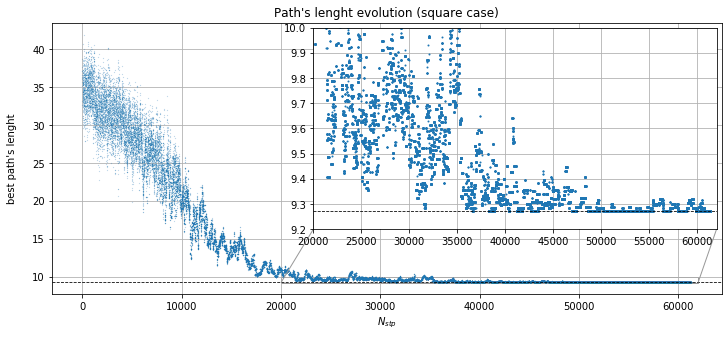

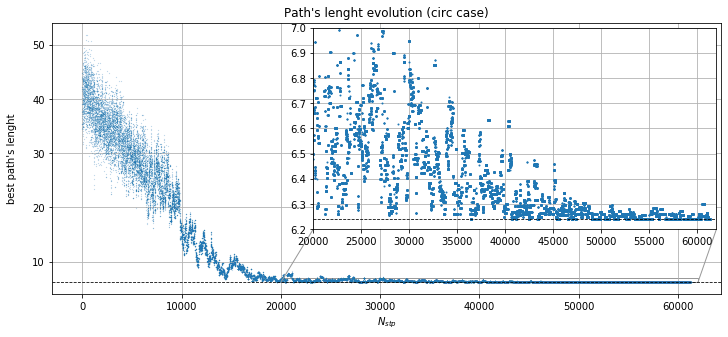

best total distance:
  square: 	 9.27331 	 with 36565 steps
  circ: 	 6.2403 	 with 36426 steps


In [6]:
for i in range(2): prog[i]=np.genfromtxt('results/path.'+loc[i]+'.32.SA.lenght',names='gen,best')

SA_fig(((2e4,6.2e4),(2e4,6.2e4)),((9.2,10),(6.2,7)))

In entrambi i casi si vede molto bene l'abbassamento graduale dell'energia del sistema, e cioè della lunghezza totale del cammino studiato.

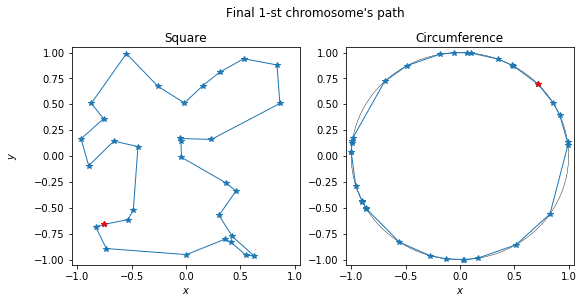

Final total distance:
  square: 	 9.27331
  circ: 	 6.2403


In [7]:
for i in range(2):
    dist[i]=np.genfromtxt('results/path.'+loc[i]+'.32.SA.best',max_rows=1)
    path[i]=np.genfromtxt('results/path.'+loc[i]+'.32.SA.best',skip_header=1,names='x,y')

path_fig(False,-1)

Il risultato conferma in entrambi i casi quello della <font face="Courier">lezione09</font>. Il numero di step qui è molto maggiore rispetto a quello delle generazioni necessarie all'algoritmo GA, e questo è dovuto principalmente alla necessaria lentezza della fase di raffreddamento. In ogni caso le operazioni svolte dall'algoritmo SA sono più semplici, e quindi in definitiva i tempi computazionali impiegati nei due casi analizzati sono del tutto confrontabili (e in generale è proprio l'algoritmo SA a convergere più velocemente alla soluzione).

#### Appendice

Ho eseguito inoltre una simulazione con $N=100$. Data la maggior complessità del problema ho dovuto aumentare sia il numero di temperature visitate sia quello di step MC eseguiti in ognuna di esse (si veda ancora il codice, <font face="Courier">main01.C</font>, per i dettagli).

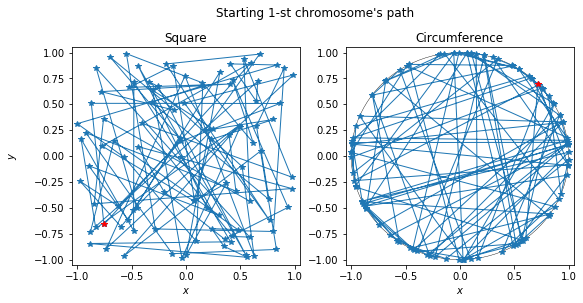

Starting total distance:
  square: 	 107.912
  circ: 	 121.07


In [8]:
for i in range(2):
    dist[i]=np.genfromtxt('results/cities.'+loc[i]+'.100.SA.start',max_rows=1)
    path[i]=np.genfromtxt('results/cities.'+loc[i]+'.100.SA.start',skip_header=1,names='x,y')

path_fig(True,-1)

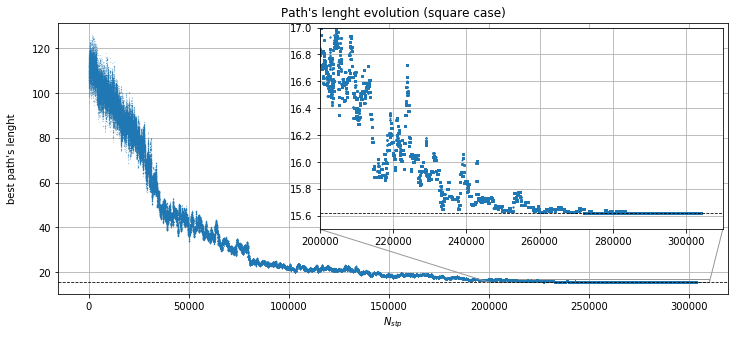

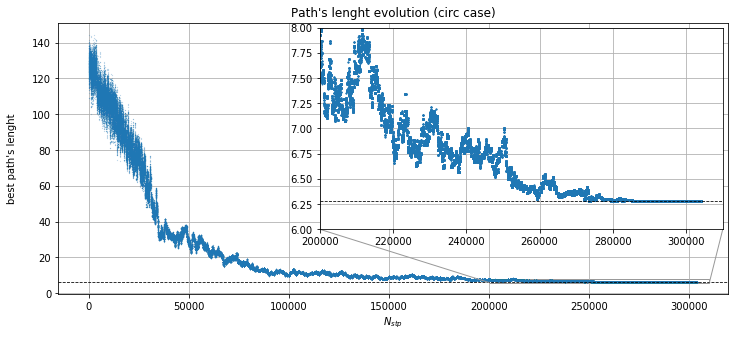

best total distance:
  square: 	 15.6211 	 with 276314 steps
  circ: 	 6.27735 	 with 286077 steps


In [9]:
for i in range(2): prog[i]=np.genfromtxt('results/path.'+loc[i]+'.100.SA.lenght',names='gen,best')

SA_fig(((2e5,3.1e5),(2e5,3.1e5)),((15.5,17),(6,8)))

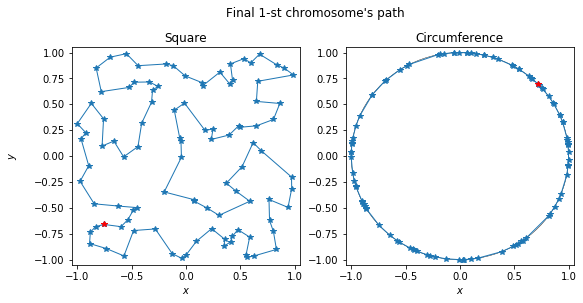

Final total distance:
  square: 	 15.6211
  circ: 	 6.27735


In [10]:
for i in range(2):
    dist[i]=np.genfromtxt('results/path.'+loc[i]+'.100.SA.best',max_rows=1)
    path[i]=np.genfromtxt('results/path.'+loc[i]+'.100.SA.best',skip_header=1,names='x,y')

path_fig(False,-1)

In questo caso, più complesso, l'algoritmo di SA è riuscito, risparmiando ancora in parte del tempo computazionale (rispetto al GA), a raggiungere in entrambe le condizioni dei risultati significativamente migliori. Anche qui però chiaramente non si ha alcuna certezza che i minimi raggiunti siano globali, e potrebbero invece rappresentare semplicemente degli stati metastabili. 

Se si confrontano infine i casi a diversi numeri di città si vede che la lunghezza del cammino sulla circonferenza aumenta passando da $N=32$ a $N=100$. Questo era atteso, in quanto più il numero di città è elevato più in media il cammino ottimale sarà aderente alla circonferenza. Si noti comunque che la lunghezza ottimizzata è, correttamente, minore di quella della circonferenza, pari a $2\pi=6.2832$.

### Esercizio 10.2

La libreria <font face="Courier">GeneticTSP</font> è pensata per il calcolo in parallelo, per il quale si appoggia sulle subroutine della libreria <font face="Courier">MPI</font>. In questo esercizio il cammino ottimale è cercato in parallelo da $4$ nodi differenti ma comunicanti: ognuno di essi esegue un'istanza del GA differente, ma ogni $N_{migr}=20$ generazioni questi continenti si scambiano il loro migliore cromosoma in maniera randomica.

Le posizioni delle città sono generate dal solo core $i_c=0$, che poi le comunica a tutti gli altri tramite un <font face="Courier">MPI_Bcast</font>.\
Il programma è del tipo SPMD (Single Program Multiple Data), e l'indipendenza statistica tra i continenti nasce dal fatto che ognuno dei nodi legge una coppia di completamento differente per inizializzare il generatore di numeri casuali.

La simulazione termina quando passano $N_{max}=1000$ generazioni senza che nessuno dei core riesca a trovare un cammino migliore di quello salvato globalmente come il più breve. In particolare una generazione prima di ogni migrazione tutti i nodi vengono a sapere se uno qualunque di loro ha trovato una lunghezza più breve di quella minima registrata e controllano poi se il programma ha raggiunto la convergenza. In questo modo o tutti o nessuno di loro tenta la migrazione successiva e il programma è protetto da punti morti.

Il numero di cromosomi della popolazione studiata è $N_{chr}=1000$ e gli operatori di crossover e di mutazione agiscono con le stesse probabilità elencate nella <font face="Courier">lezione09</font>, $p_c=85\%$, $p_m^1=3\%$, $p_m^2=6\%$, $p_m^3=8\%$, $p_m^4=10\%$.

Qui sotto la condizione iniziale per i diversi continenti e i risultati del programma.

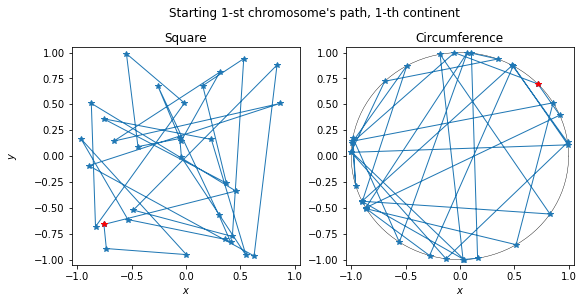

Starting total distance:
  square: 	 33.7649
  circ: 	 40.8131


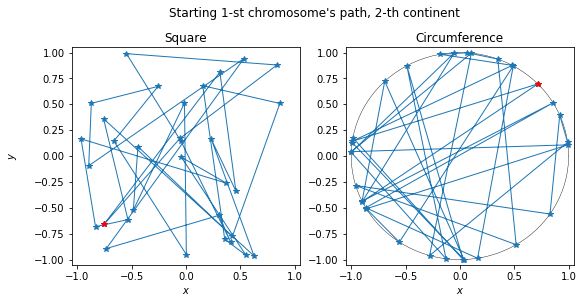

Starting total distance:
  square: 	 34.2832
  circ: 	 45.976


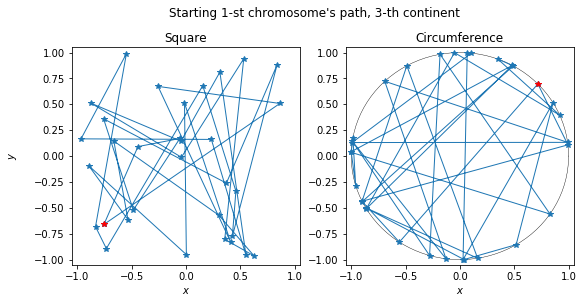

Starting total distance:
  square: 	 35.2928
  circ: 	 41.9892


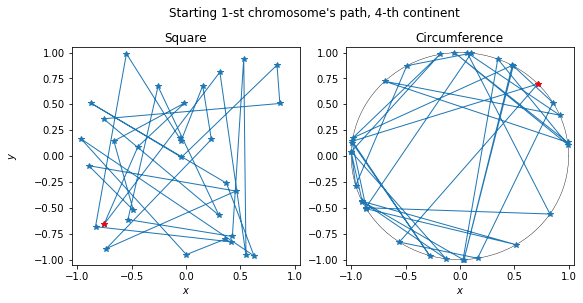

Starting total distance:
  square: 	 35.1963
  circ: 	 42.1848


In [11]:
for icore in range(4):
    for i in range(2):
        dist[i]=np.genfromtxt('results/cities.'+loc[i]+'.32_'+str(icore)+'.start',max_rows=1)
        path[i]=np.genfromtxt('results/cities.'+loc[i]+'.32_'+str(icore)+'.start',skip_header=1,names='x,y')

    path_fig(True,icore)

In [12]:
prog=[0 for icore in range(4)]
def evolution(ncit,loc,ylim):     #loc could be 'square' or 'circ'
    very_min,very_gen=100.,1e10   #min and index over all cores

    for icore in range(4):
        namefile='results/path.'+loc+'.'+str(ncit)+'_'+str(icore)+'.lenght'
        prog[icore]=np.genfromtxt(namefile,names='gen,best,mean')
        best=min(prog[icore]['best']); index=np.argmin(prog[icore]['best'])
        if(best<=very_min):
            if(index<very_gen): very_min=best; very_gen=index; core_index=icore

    pl.figure(figsize=(14,8))
    for icore in range(4):
        pl.subplot(2,2,icore+1)
        pl.plot(prog[icore]['gen'],prog[icore]['mean'],marker='.',linestyle='',label='1st half')
        pl.plot(prog[icore]['gen'],prog[icore]['best'],marker='.',linestyle='',label='best')
        pl.axhline(y=very_min,color='k',linestyle='dashed',linewidth=0.8)
        pl.legend(loc='best')
        pl.grid(True)
        pl.ylim(ylim)
        pl.xlabel('$N_{gen}$')
        pl.ylabel("path's lenght",labelpad=15)
        pl.title(str(icore+1)+'th continent')
    pl.suptitle("Progression of best path's and 1st half paths' lenghts, "+loc+" case")
    pl.subplots_adjust(hspace=0.3, wspace=0.3)
    pl.show()
    
    print('best total distance found first by the '+str(core_index+1)+'-th continent:')
    print('  '+loc+': \t',very_min,'\t with',very_gen,'generations')

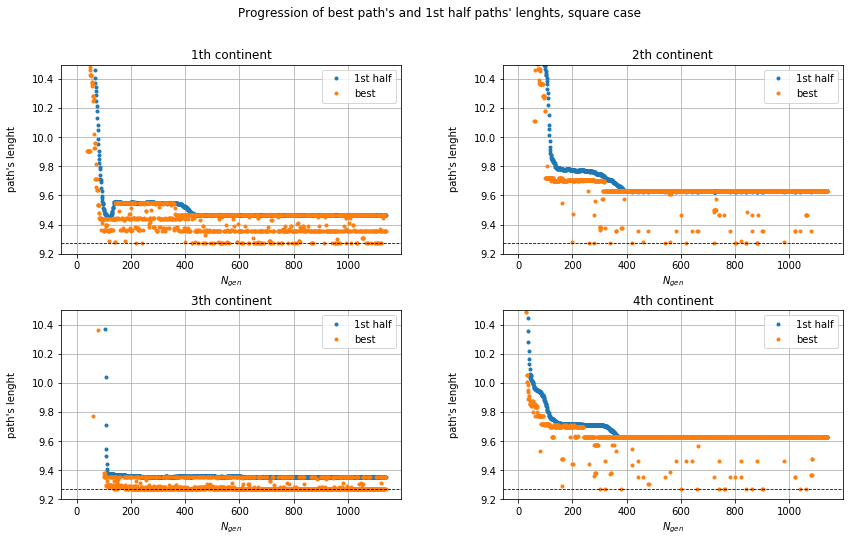

best total distance found first by the 3-th continent:
  square: 	 9.27331 	 with 135 generations


In [13]:
evolution(32,'square',(9.2,10.5))

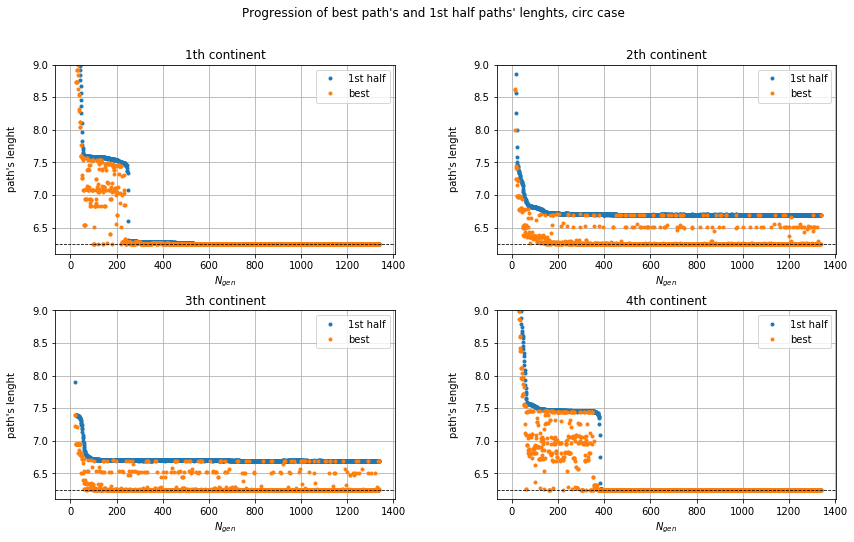

best total distance found first by the 3-th continent:
  circ: 	 6.2403 	 with 207 generations


In [14]:
evolution(32,'circ',(6.1,9))

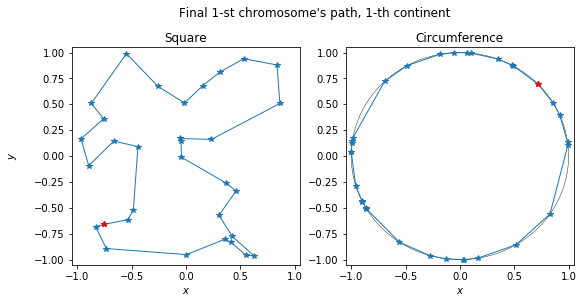

Final total distance:
  square: 	 9.27331
  circ: 	 6.2403


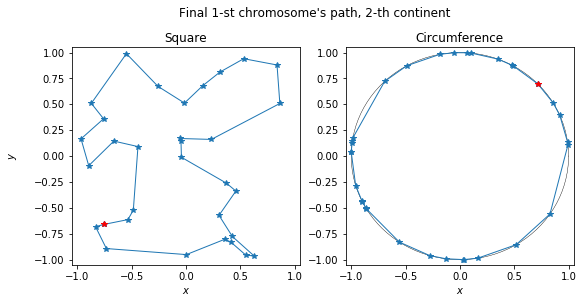

Final total distance:
  square: 	 9.27331
  circ: 	 6.2403


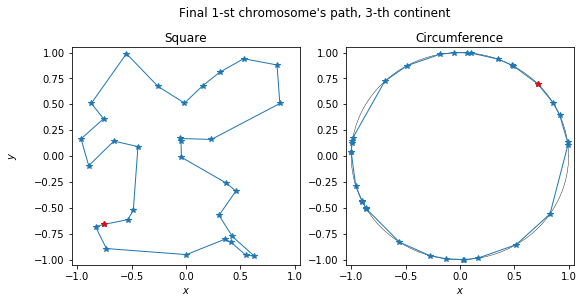

Final total distance:
  square: 	 9.27331
  circ: 	 6.2403


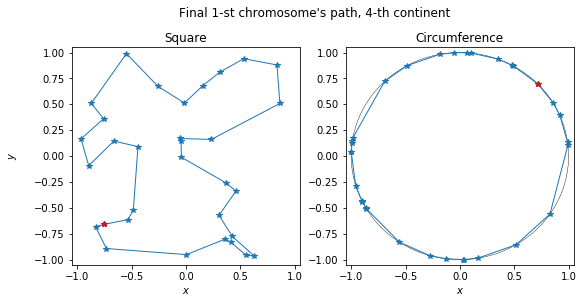

Final total distance:
  square: 	 9.27331
  circ: 	 6.2403


In [15]:
for icore in range(4):
    for i in range(2):
        dist[i]=np.genfromtxt('results/path.'+loc[i]+'.32_'+str(icore)+'.best',max_rows=1)
        path[i]=np.genfromtxt('results/path.'+loc[i]+'.32_'+str(icore)+'.best',skip_header=1,names='x,y')

    path_fig(False,icore)

Il tempo di esecuzione del programma è confrontabile con quello della sua versione più semplice a singolo core (<font face="Courier">lezione09</font>), così come il numero di generazioni necessarie a trovare il minimo. Il risultato ottenuto è identico, e quindi in definitiva le prestazioni non sembrano migliorate. Questo però è vero solo perché il problema a $32$ città è piuttosto semplice. Nell'appendice esamino il caso più complicato a $100$ città, nel quale emerge più immediata la maggior potenza di calcolo legata alla parallelizzazione del codice.

#### Appendice

A causa della maggior complessità del problema ho aumentato il numero di cromosomi a $N_{chr}=2000$.\
Nel caso 'circ' ho inoltre riscontrato particolare difficoltà nel far convergere tutti i core alla stessa soluzione. Per cercare di ottenere una maggiore efficienza nella comunicazione inter-core ho quindi, solo in questo caso, ridotto il numero di generazioni tra due migrazioni successive a $N_{migr}=10$.

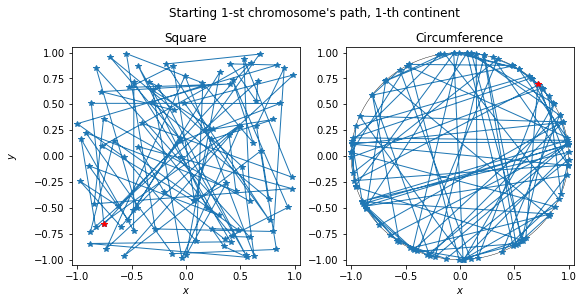

Starting total distance:
  square: 	 107.912
  circ: 	 121.07


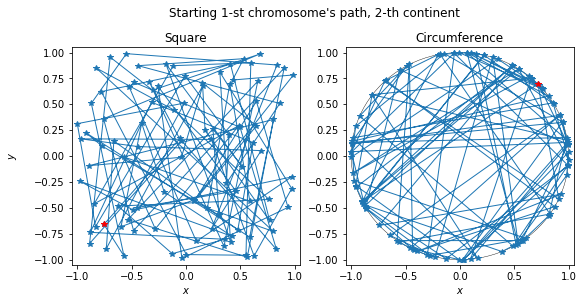

Starting total distance:
  square: 	 113.031
  circ: 	 119.5


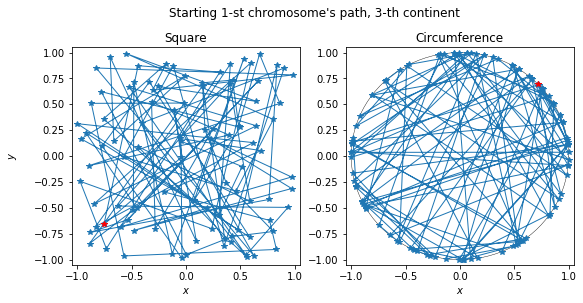

Starting total distance:
  square: 	 118.537
  circ: 	 135.087


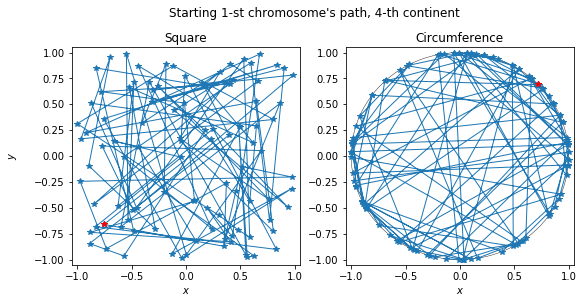

Starting total distance:
  square: 	 112.173
  circ: 	 111.784


In [16]:
for icore in range(4):
    for i in range(2):
        dist[i]=np.genfromtxt('results/cities.'+loc[i]+'.100_'+str(icore)+'.start',max_rows=1)
        path[i]=np.genfromtxt('results/cities.'+loc[i]+'.100_'+str(icore)+'.start',skip_header=1,names='x,y')

    path_fig(True,icore)

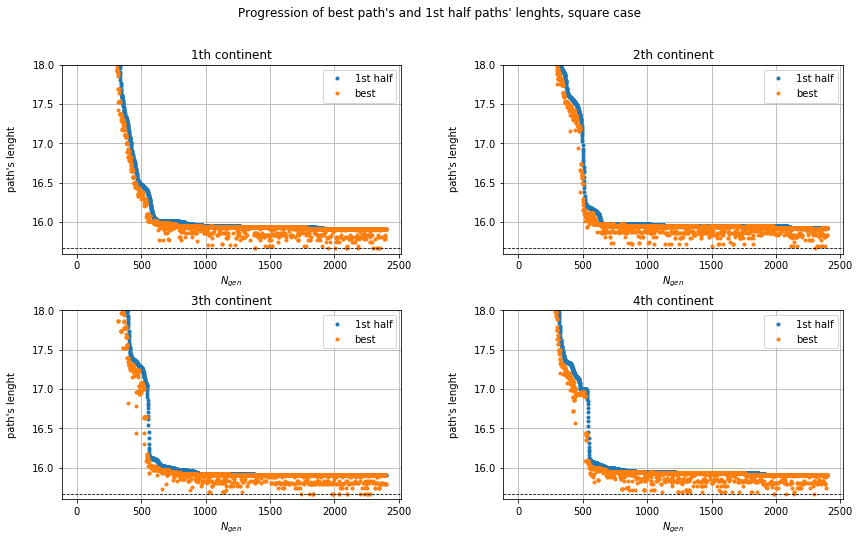

best total distance found first by the 1-th continent:
  square: 	 15.6695 	 with 1379 generations


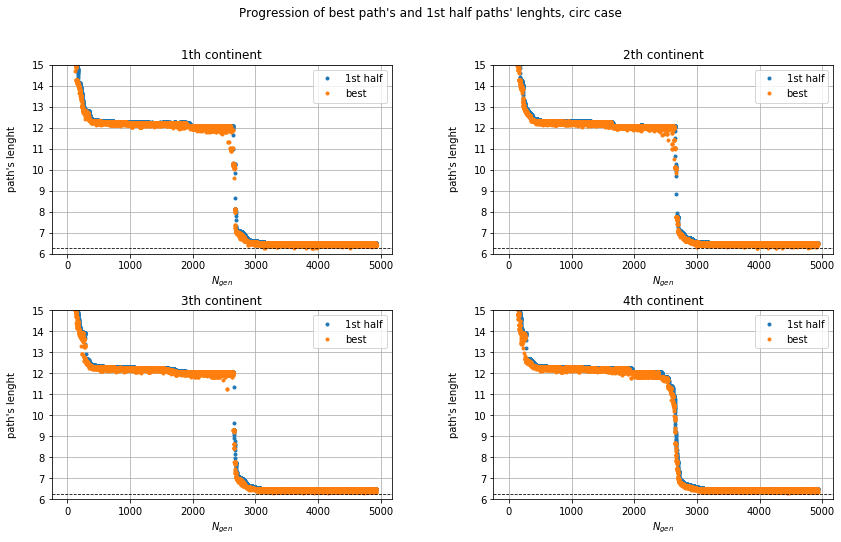

best total distance found first by the 1-th continent:
  circ: 	 6.27735 	 with 3921 generations


In [17]:
evolution(100,'square',(15.6,18))
evolution(100,'circ',(6,15))

Attribuisco il plateau osservato nel caso delle città sulla circonferenza al piccolo valore di $N_{migr}=10$. In effetti una distanza troppo breve tra due migrazioni consecutive rischia di bloccare per molto tempo la simulazione su un minimo locale (ed in effetti per esempio nel caso 'square' usare $N_{migr}=10$ ha l'effetto di peggiorare la soluzione finale portando proprio ad una stagnazione dei cammini in uno stato metastabile). Questo perché la comunicazione tra i continenti permette sì in generale di rendere più veloce l'evoluzione dei cromosomi (in pratica ho $4$ ricerche che non sono più indipendenti, ma che in qualche modo si aiutano a vicenda), ma se gli scambi sono troppo frequenti una soluzione locale, diffondendosi molto in fretta in tutti i processi, può in effetti bloccare tutte le ricerche nello  stesso stato metastabile prima che uno degli altri processi possa efficacemente esplorare una "via di fuga" verso un'ottimizzazione migliore. Qui la conseguenza è che l'ottimizzazione richiede un'evoluzione più lunga rispetto al più semplice programma lineare, e quindi un maggior tempo di esecuizione. 

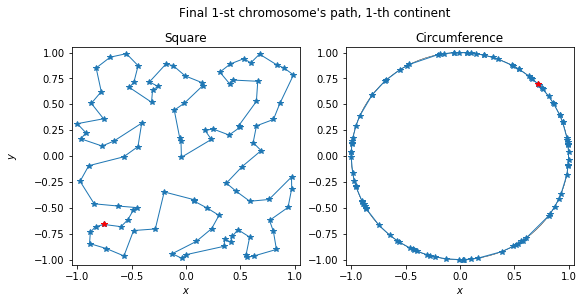

Final total distance:
  square: 	 15.6695
  circ: 	 6.27735


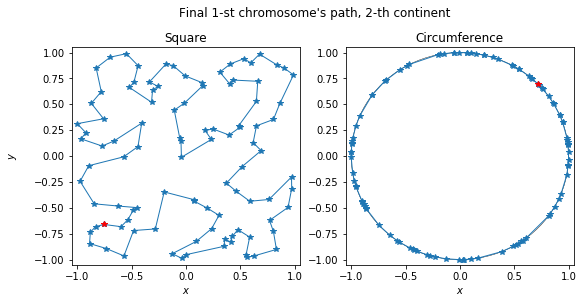

Final total distance:
  square: 	 15.6695
  circ: 	 6.28436


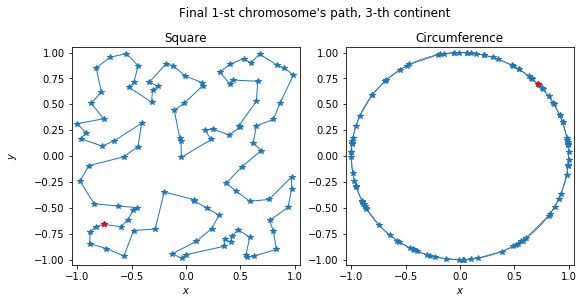

Final total distance:
  square: 	 15.6695
  circ: 	 6.2835


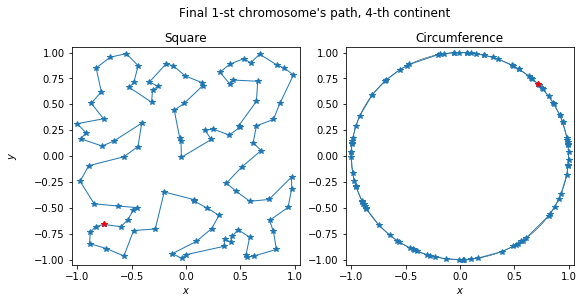

Final total distance:
  square: 	 15.6695
  circ: 	 6.30359


In [18]:
for icore in range(4):
    for i in range(2):
        dist[i]=np.genfromtxt('results/path.'+loc[i]+'.100_'+str(icore)+'.best',max_rows=1)
        path[i]=np.genfromtxt('results/path.'+loc[i]+'.100_'+str(icore)+'.best',skip_header=1,names='x,y')

    path_fig(False,icore)

In entrambi i casi si hanno dei risultati significativamente migliori rispetto a quelli ottenuti nella <font face="Courier">lezione09</font>.\
Mentre nel caso delle città nel quadrato i tempi di esecuzione lineare e in parallelo sono confrontabili (è vero che qui il numero di generazioni per trovare il minimo è all'incirca la metà di quello della <font face="Courier">lezione09</font>, ma tutti i processi di comunicazione tra i core impiegano comunque un tempo macchina non indifferente), nel caso delle città sulla circonferenza l'esecuzione a $4$ core ha richiesto un tempo di esecuzione e un numero di generazioni significativamente maggiore per trovare il minimo (qui la run dura più di un'ora, contro i quindici minuti del programma a singolo core). Ritengo che questo sia dovuto principalmente alla riduzione di $N_{migr}$, che produce il plateau di cui sopra. D'altra parte questa scelta permette di ottenere una soluzione finale migliore, quindi ho deciso di lasciare questa come decisione definitiva.

Come anticipato, nel caso della circonferenza solo nel primo continente si resce ad osservare la soluzione (probabilmente) ottimale, che coincide con quella trovata dal SA, e questo nonostante l'aver reso più frequenti le migrazioni con $N_{mig}=10$. Ritengo comunque non sia un problema così rilevante da richiedere ulteriori approfondimenti. Per il risultato meglio ottimizzato basta guardare il primo continente.\
Attribuisco questa difficoltà di diffusione della soluzione ottimale al fatto che sulla circonferenza molte città sono tra loro estremamente vicine, e quindi la differenza tra le varie lunghezze dei cammini può essere molto piccola. Il programma può di conseguenza incontrare molta difficoltà ad effettuare una selezione efficiente, e la soluzione migliore può essere persa facilmente a causa degli operatori di mutazione e di crossover prima di riuscire a migrare. Per cercare di risolvere il problema una delle possibili strade potrebbe essere quindi quella di ridurre la probabilità di questi operatori (credo invece che l'operatore di selezione sia già abbastanza "rigido" e che assegnare ai cromosomi dei pesi statistici ancora più discriminanti possa portare ad una riduzione eccessiva della capicità di esplorazione dell'algoritmo nello spazio delle possibili soluzioni).